In [3]:
# Importing Necessary Libraries:
import pandas as pd
import numpy as np

## Data Cleaning & Pre-Processing :

### 1. Customers.csv File:

In [4]:
df_customer = pd.read_csv("customers.csv", encoding="ISO-8859-1")
df_customer

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,7/3/1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11/9/1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10/12/1937


##### Characters from other encoding sets(than UTF-8 character encoding),  accented letters (like ü,ó,)  specific to a particular region, causing issues with UTF-8 interpretation hence, a different encoding is used(encoding="ISO-8859-1").

### Checking NULL Values and Processing:

In [5]:
df_customer.isnull().sum()

CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64

##### Statecode has 10 Null values.

#### Seeing the null rows to understand the problem:

In [6]:
# Displaying rows where State Code is null
df_customer[df_customer['State Code'].isnull()]

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


In [7]:
# Displaying rows where State is Napoli:
df_customer[df_customer['State'] == 'Napoli']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
5304,729681,Female,Rossana Padovesi,Polvica,NaN,Napoli,80035,Italy,Europe,4/18/1981
5316,732289,Male,Indro Piccio,Varcaturo,NaN,Napoli,80014,Italy,Europe,2/24/1949
5372,742042,Male,Amaranto Loggia,Casaferro,NaN,Napoli,80034,Italy,Europe,3/14/1936
5377,742886,Female,Edmonda Capon,Terzigno,NaN,Napoli,80040,Italy,Europe,8/6/1963
5378,743343,Female,Ambra Sagese,Pomigliano D'Arco,NaN,Napoli,80038,Italy,Europe,1/5/1961
5485,759705,Male,Callisto Lo Duca,Casilli,NaN,Napoli,80047,Italy,Europe,8/28/1976
5525,765589,Male,Michelino Lucchesi,Pompei Scavi,NaN,Napoli,80045,Italy,Europe,11/13/1947
5531,766410,Male,Adelmio Beneventi,Licola,NaN,Napoli,80078,Italy,Europe,1/13/1940
5631,781667,Female,Ilda Manna,Napoli,NaN,Napoli,80134,Italy,Europe,5/8/1977
5695,789177,Male,Calogero Folliero,Mariglianella,NaN,Napoli,80030,Italy,Europe,3/3/2000


##### All rows with state name 'Napoli' has null values in State Code.

##### Checking if there is any statecode as 'NA', as checking sources referred Napoli's State code is 'NA'. If there is'nt any other states with the same code, we can fill the null values with 'NA'.

In [8]:
# Displaying rows where State code is NA:
df_customer[df_customer['State Code'] == 'NA']

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday


In [9]:
# As there is no codes as 'NA', and the official website says, Napoli's State code is 'NA'. It is filled.

# Directly filling null values in the specific column
df_customer['State Code'] = df_customer['State Code'].fillna('NA')

# Verifying if the null values have been filled
print(df_customer[df_customer['State'] == 'Napoli'])
print(df_customer.isnull().sum())

      CustomerKey  Gender                Name               City State Code  \
5304       729681  Female    Rossana Padovesi            Polvica         NA   
5316       732289    Male        Indro Piccio          Varcaturo         NA   
5372       742042    Male     Amaranto Loggia          Casaferro         NA   
5377       742886  Female       Edmonda Capon           Terzigno         NA   
5378       743343  Female        Ambra Sagese  Pomigliano D'Arco         NA   
5485       759705    Male    Callisto Lo Duca            Casilli         NA   
5525       765589    Male  Michelino Lucchesi       Pompei Scavi         NA   
5531       766410    Male   Adelmio Beneventi             Licola         NA   
5631       781667  Female          Ilda Manna             Napoli         NA   
5695       789177    Male   Calogero Folliero      Mariglianella         NA   

       State Zip Code Country Continent    Birthday  
5304  Napoli    80035   Italy    Europe   4/18/1981  
5316  Napoli    80014 

### Checking for Duplicates Rows and Processing it: 

In [10]:
# Counting of duplicate CustomerKeys as they cannot be repeated.(Probably the Primary Key)
duplicate_count = df_customer['CustomerKey'].duplicated().sum()
print(f"Number of duplicate Customer Keys: {duplicate_count}")


Number of duplicate Customer Keys: 0


##### There is no Duplicate Customer Keys. Hence No Need for Processing.

### Checking Data Types and Processing:

In [11]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15266 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


#### Converting Birthday Column to Date Time Format:

In [12]:
# Converting the Birthday column to datetime format:
df_customer['Birthday'] = pd.to_datetime(df_customer['Birthday'], format='%m/%d/%Y', errors='coerce')


In [13]:
# Checking for NaT entries in the Birthday column(after coercing the errors):
nat_entries = df_customer[df_customer['Birthday'].isna()]
print(nat_entries)

# Counting of NaT entries in the Birthday column after coercing:
nat_count = df_customer['Birthday'].isna().sum()
print(f"Number of NaT entries in Birthday: {nat_count}")


Empty DataFrame
Columns: [CustomerKey, Gender, Name, City, State Code, State, Zip Code, Country, Continent, Birthday]
Index: []
Number of NaT entries in Birthday: 0


In [14]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(8)
memory usage: 1.2+ MB


### The columns that are converted to string data types: (From object to str)

#### Columns to Convert to String:

#### CustomerKey: It is just an identifier and no calculations are done over it, Hence converting to string data type.

#### Gender: This is categorical data, so converting it to string.

#### Name: This should be a string since it contains text.

#### City: This is also categorical and should be stored as a string.

#### State Code: It appears to be categorical (e.g., SA, WA), storing it as a string can help preserve any specific formats.

#### State: This represents categorical data, so it should be a string.

#### Zip Code: Since it can contain leading zeros and alpha numericals with symbols (in some cases), it’s safe to store it as a string.

#### Country: This is categorical data, so convert it to string.

#### Continent: This is categorical and should be a string.

In [15]:
# Converting specified columns to string
columns_to_convert = ['CustomerKey', 'Gender', 'Name', 'City', 'State Code', 'State', 'Zip Code', 'Country', 'Continent']
df_customer[columns_to_convert] = df_customer[columns_to_convert].astype(str)

# Verifying the changes
print(df_customer.dtypes)


CustomerKey            object
Gender                 object
Name                   object
City                   object
State Code             object
State                  object
Zip Code               object
Country                object
Continent              object
Birthday       datetime64[ns]
dtype: object


In [16]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  object        
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
dtypes: datetime64[ns](1), object(9)
memory usage: 1.2+ MB


### 2. Products.csv:

In [17]:
df_products = pd.read_csv("products.csv")
df_products

,ProductKey,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,1,Contoso 512MB MP3 Player E51 Silver,Contoso,Silver,$6.62,$12.99,101,MP4&MP3,1,Audio
1,2,Contoso 512MB MP3 Player E51 Blue,Contoso,Blue,$6.62,$12.99,101,MP4&MP3,1,Audio
2,3,Contoso 1G MP3 Player E100 White,Contoso,White,$7.40,$14.52,101,MP4&MP3,1,Audio
3,4,Contoso 2G MP3 Player E200 Silver,Contoso,Silver,$11.00,$21.57,101,MP4&MP3,1,Audio
4,5,Contoso 2G MP3 Player E200 Red,Contoso,Red,$11.00,$21.57,101,MP4&MP3,1,Audio
...,...,...,...,...,...,...,...,...,...,...
2512,2513,Contoso Bluetooth Active Headphones L15 Red,Contoso,Red,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2513,2514,Contoso Bluetooth Active Headphones L15 White,Contoso,White,$43.07,$129.99,505,Cell phones Accessories,5,Cell phones
2514,2515,Contoso In-Line Coupler E180 White,Contoso,White,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones
2515,2516,Contoso In-Line Coupler E180 Black,Contoso,Black,$1.71,$3.35,505,Cell phones Accessories,5,Cell phones


### Checking NULL Values and Processing:

In [18]:
df_products.isnull().sum()

ProductKey        0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

##### There is No Null Values.

### Checking for Duplicates Rows and Processing it: 

In [19]:
# Counting of duplicate CustomerKeys as they cannot be repeated.(Probably the Primary Key)
duplicate_count = df_products[['ProductKey','Product Name']].duplicated().sum()
print(f"Number of duplicate Product Keys and Product Name : {duplicate_count}")

Number of duplicate Product Keys and Product Name : 0


##### There is no Duplicate Rows Hence no Pre-Processing Required.

### Checking Data Types and Processing:

In [20]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ProductKey      2517 non-null   int64 
 1   Product Name    2517 non-null   object
 2   Brand           2517 non-null   object
 3   Color           2517 non-null   object
 4   Unit Cost USD   2517 non-null   object
 5   Unit Price USD  2517 non-null   object
 6   SubcategoryKey  2517 non-null   int64 
 7   Subcategory     2517 non-null   object
 8   CategoryKey     2517 non-null   int64 
 9   Category        2517 non-null   object
dtypes: int64(3), object(7)
memory usage: 196.8+ KB


In [21]:
# Converting specified columns to string
columns_to_convert = ['Product Name', 'Brand', 'Color', 'Unit Price USD', 'Unit Cost USD', 'Subcategory', 'Category']
df_products[columns_to_convert] = df_products[columns_to_convert].astype(str)

# Verifying the changes
print(df_products.dtypes)

ProductKey         int64
Product Name      object
Brand             object
Color             object
Unit Cost USD     object
Unit Price USD    object
SubcategoryKey     int64
Subcategory       object
CategoryKey        int64
Category          object
dtype: object


#### Cleaning the Unit Cost and Unit Price to make it Float:

In [22]:
# Defining a function to remove the '$' symbol and the comma separating thousands and making it float dtype:
def remove_dollar_sign(amount):
    return float(amount.replace("$", "").replace(",", ""))

# Applying the function to the “Unit Cost USD” column with apply
df_products["Unit Cost USD"] = df_products["Unit Cost USD"].apply(remove_dollar_sign)
df_products["Unit Price USD"] = df_products["Unit Price USD"].apply(remove_dollar_sign)

# Showing updated columns
df_products[["Unit Cost USD", "Unit Price USD"]]


,Unit Cost USD,Unit Price USD
0,6.62,12.99
1,6.62,12.99
2,7.40,14.52
3,11.00,21.57
4,11.00,21.57
...,...,...
2512,43.07,129.99
2513,43.07,129.99
2514,1.71,3.35
2515,1.71,3.35


In [23]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ProductKey      2517 non-null   int64  
 1   Product Name    2517 non-null   object 
 2   Brand           2517 non-null   object 
 3   Color           2517 non-null   object 
 4   Unit Cost USD   2517 non-null   float64
 5   Unit Price USD  2517 non-null   float64
 6   SubcategoryKey  2517 non-null   int64  
 7   Subcategory     2517 non-null   object 
 8   CategoryKey     2517 non-null   int64  
 9   Category        2517 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 196.8+ KB


### 3.Sales.csv:

In [24]:
df_sales = pd.read_csv("sales.csv")
df_sales.head(10)

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,1/1/2016,NaN,265598,10,1304,1,CAD
1,366001,1,1/1/2016,1/13/2016,1269051,0,1048,2,USD
2,366001,2,1/1/2016,1/13/2016,1269051,0,2007,1,USD
3,366002,1,1/1/2016,1/12/2016,266019,0,1106,7,CAD
4,366002,2,1/1/2016,1/12/2016,266019,0,373,1,CAD
5,366002,3,1/1/2016,1/12/2016,266019,0,1080,4,CAD
6,366004,1,1/1/2016,NaN,1107461,38,163,6,GBP
7,366004,2,1/1/2016,NaN,1107461,38,1529,2,GBP
8,366005,1,1/1/2016,NaN,844003,33,421,4,EUR
9,366007,1,1/1/2016,NaN,2035771,43,1617,1,USD


### Checking NULL Values and Processing:

In [25]:
df_sales.isnull().sum()

Order Number         0
Line Item            0
Order Date           0
Delivery Date    49719
CustomerKey          0
StoreKey             0
ProductKey           0
Quantity             0
Currency Code        0
dtype: int64

In [26]:
# Filtering rows where 'Delivery Date' is null and 'StoreKey' is 0
null_delivery_store_0 = df_sales[(df_sales['Delivery Date'].isnull()) & (df_sales['StoreKey'] == 0)]

# Displaying the filtered rows
print(null_delivery_store_0)

Empty DataFrame
Columns: [Order Number, Line Item, Order Date, Delivery Date, CustomerKey, StoreKey, ProductKey, Quantity, Currency Code]
Index: []


##### From here we can understand that, null values arethere only where store is not online.(store key 0 represent 'Online Order'. Store sales are same day deliveries. )

In [27]:
# Assigning 'Order Date' as 'Delivery Date' where 'Delivery Date' is null
df_sales['Delivery Date'] = df_sales['Delivery Date'].fillna(df_sales['Order Date']) # As they are store take aways

In [28]:
# Assigning 'Order Date' as 'Delivery Date' where 'Delivery Date' is null
df_sales['Delivery Date'] = df_sales['Delivery Date'].fillna(df_sales['Order Date'])  # As they are store takeaways

# Converting the 'Order Date' and 'Delivery Date' columns to datetime format
df_sales['Order Date'] = pd.to_datetime(df_sales['Order Date'], format='%m/%d/%Y', errors='coerce')
df_sales['Delivery Date'] = pd.to_datetime(df_sales['Delivery Date'], format='%m/%d/%Y', errors='coerce')

# Checking for NaT entries in the 'Order Date' and 'Delivery Date' columns after coercing errors
nat_entries = df_sales[df_sales[['Order Date', 'Delivery Date']].isna().any(axis=1)]
print(nat_entries)

# Counting NaT entries in the 'Order Date' and 'Delivery Date' columns after coercing
nat_count = df_sales[['Order Date', 'Delivery Date']].isna().sum()
print(f"Number of NaT entries in 'Order Date': {nat_count['Order Date']}")
print(f"Number of NaT entries in 'Delivery Date': {nat_count['Delivery Date']}")


Empty DataFrame
Columns: [Order Number, Line Item, Order Date, Delivery Date, CustomerKey, StoreKey, ProductKey, Quantity, Currency Code]
Index: []
Number of NaT entries in 'Order Date': 0
Number of NaT entries in 'Delivery Date': 0


In [29]:
df_sales

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD
...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-20,1216913,43,632,3,USD
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD


In [30]:
df_sales.isnull().sum()

Order Number     0
Line Item        0
Order Date       0
Delivery Date    0
CustomerKey      0
StoreKey         0
ProductKey       0
Quantity         0
Currency Code    0
dtype: int64

### Checking for Duplicates and Processing:

In [31]:
# Checking for duplicate rows in the entire DataFrame
duplicate_rows = df_sales.duplicated()

# Counting the number of duplicate rows
duplicate_count = duplicate_rows.sum()

# Displaying the duplicate rows if needed
duplicates = df_sales[duplicate_rows]

print(f"Number of duplicate rows: {duplicate_count}")
print("Duplicate Rows:")
print(duplicates)

Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [Order Number, Line Item, Order Date, Delivery Date, CustomerKey, StoreKey, ProductKey, Quantity, Currency Code]
Index: []


### Checking Data Types and Processing:

In [32]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Order Number   62884 non-null  int64         
 1   Line Item      62884 non-null  int64         
 2   Order Date     62884 non-null  datetime64[ns]
 3   Delivery Date  62884 non-null  datetime64[ns]
 4   CustomerKey    62884 non-null  int64         
 5   StoreKey       62884 non-null  int64         
 6   ProductKey     62884 non-null  int64         
 7   Quantity       62884 non-null  int64         
 8   Currency Code  62884 non-null  object        
dtypes: datetime64[ns](2), int64(6), object(1)
memory usage: 4.3+ MB


In [33]:
# Correcting the column name and converting specified columns to string
columns_to_convert = ['CustomerKey', 'Currency Code','Order Number']
df_sales[columns_to_convert] = df_sales[columns_to_convert].astype(str)

# Verifying the changes
print(df_sales.dtypes)


Order Number             object
Line Item                 int64
Order Date       datetime64[ns]
Delivery Date    datetime64[ns]
CustomerKey              object
StoreKey                  int64
ProductKey                int64
Quantity                  int64
Currency Code            object
dtype: object


### 4. Stores:

In [34]:
df_stores = pd.read_csv("stores.csv")
df_stores.head(10)

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,1/1/2008
1,2,Australia,Northern Territory,665.0,1/12/2008
2,3,Australia,South Australia,2000.0,1/7/2012
3,4,Australia,Tasmania,2000.0,1/1/2010
4,5,Australia,Victoria,2000.0,12/9/2015
5,6,Australia,Western Australia,2000.0,1/1/2010
6,7,Canada,New Brunswick,1105.0,5/7/2007
7,8,Canada,Newfoundland and Labrador,2105.0,7/2/2014
8,9,Canada,Northwest Territories,1500.0,3/4/2005
9,10,Canada,Nunavut,1210.0,4/4/2015


### Checking NULL Values and Processing:

In [35]:
df_stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    1
Open Date        0
dtype: int64

In [36]:
df_stores[df_stores['Square Meters'].isnull()]

,StoreKey,Country,State,Square Meters,Open Date
66,0,Online,Online,NaN,1/1/2010


##### Only 1 store shows null value in square meters. And that is found to be an Online Store, where area of the store is irrelevant.Hence, it is changed to "0".

In [37]:
df_stores['Square Meters'] = df_stores['Square Meters'].fillna(0)

In [38]:
df_stores.isnull().sum()

StoreKey         0
Country          0
State            0
Square Meters    0
Open Date        0
dtype: int64

### Checking for Duplicates and Processing:

In [39]:
# Checking for duplicate rows in the entire DataFrame
duplicate_rows = df_stores.duplicated()

# Counting the number of duplicate rows
duplicate_count = duplicate_rows.sum()

# Displaying the duplicate rows if needed
duplicates = df_stores[duplicate_rows]

print(f"Number of duplicate rows: {duplicate_count}")
print("Duplicate Rows:")
print(duplicates)

#df.duplicated(): This method checks for duplicate rows in the entire DataFrame. It returns True for rows that are duplicates of previous rows.

Number of duplicate rows: 0
Duplicate Rows:
Empty DataFrame
Columns: [StoreKey, Country, State, Square Meters, Open Date]
Index: []


### Checking Data Types and Processing:

In [40]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   StoreKey       67 non-null     int64  
 1   Country        67 non-null     object 
 2   State          67 non-null     object 
 3   Square Meters  67 non-null     float64
 4   Open Date      67 non-null     object 
dtypes: float64(1), int64(1), object(3)
memory usage: 2.7+ KB


In [41]:
# Converting specified columns to string
columns_to_convert = ['Country', 'State']
df_stores[columns_to_convert] = df_stores[columns_to_convert].astype(str)

# Verifying the changes
print(df_stores.dtypes)

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object


In [42]:
# Converting specified columns to string
columns_to_convert = ['Square Meters']
df_stores[columns_to_convert] = df_stores[columns_to_convert].astype(float)

# Verifying the changes
print(df_stores.dtypes)

StoreKey           int64
Country           object
State             object
Square Meters    float64
Open Date         object
dtype: object


##### Here store key is kept as integer for future retrivals. Country, State are converted to Strings. Square Area is converted to Float data type.

In [43]:
# Converting the 'Open Date' column to datetime format:
df_stores['Open Date'] = pd.to_datetime(df_stores['Open Date'], format='%m/%d/%Y', errors='coerce')

# Checking for NaT entries in the 'Open Date '(after coercing the errors):
nat_entries = df_stores[df_stores['Open Date'].isna()]
print(nat_entries)

# Counting of NaT entries in the 'Open Date' column after coercing:
nat_count = df_stores['Open Date'].isna().sum()
print(f"Number of NaT entries in Open Date: {nat_count}")

Empty DataFrame
Columns: [StoreKey, Country, State, Square Meters, Open Date]
Index: []
Number of NaT entries in Open Date: 0


In [44]:
df_stores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   StoreKey       67 non-null     int64         
 1   Country        67 non-null     object        
 2   State          67 non-null     object        
 3   Square Meters  67 non-null     float64       
 4   Open Date      67 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 2.7+ KB


In [45]:
df_stores

,StoreKey,Country,State,Square Meters,Open Date
0,1,Australia,Australian Capital Territory,595.0,2008-01-01
1,2,Australia,Northern Territory,665.0,2008-01-12
2,3,Australia,South Australia,2000.0,2012-01-07
3,4,Australia,Tasmania,2000.0,2010-01-01
4,5,Australia,Victoria,2000.0,2015-12-09
...,...,...,...,...,...
62,63,United States,Utah,2000.0,2008-03-06
63,64,United States,Washington DC,1330.0,2010-01-01
64,65,United States,West Virginia,1785.0,2012-01-01
65,66,United States,Wyoming,840.0,2014-01-01


##### Open Date is converted to 'Date Time Object'.

### 4. Exchange Rate:

In [46]:
df_exchange = pd.read_csv("exchange_rates.csv")
df_exchange

,Date,Currency,Exchange
0,1/1/2015,USD,1.0000
1,1/1/2015,CAD,1.1583
2,1/1/2015,AUD,1.2214
3,1/1/2015,EUR,0.8237
4,1/1/2015,GBP,0.6415
...,...,...,...
11210,2/20/2021,USD,1.0000
11211,2/20/2021,CAD,1.2610
11212,2/20/2021,AUD,1.2723
11213,2/20/2021,EUR,0.8238


### Checking NULL Values and Processing:

In [47]:
df_exchange.isnull().sum()

Date        0
Currency    0
Exchange    0
dtype: int64

### Checking for Duplicates and Processing:

In [48]:
# Checking for duplicate rows in the entire DataFrame
duplicate_rows = df_exchange.duplicated()

# Counting the number of duplicate rows
duplicate_count = df_exchange.sum()

# Displaying the duplicate rows if needed
duplicates = df_exchange[duplicate_rows]

print(f"Number of duplicate rows: {duplicate_count}")
print("Duplicate Rows:")
print(duplicates)

#df.duplicated(): This method checks for duplicate rows in the entire DataFrame. It returns True for rows that are duplicates of previous rows.

Number of duplicate rows: Date        1/1/20151/1/20151/1/20151/1/20151/1/20151/2/20...
Currency    USDCADAUDEURGBPUSDCADAUDEURGBPUSDCADAUDEURGBPU...
Exchange                                           11906.7682
dtype: object
Duplicate Rows:
Empty DataFrame
Columns: [Date, Currency, Exchange]
Index: []


In [49]:
# Checking for duplicate rows based on 'Date', 'Currency', and 'Exchange'
duplicate_rows = df_exchange[df_exchange.duplicated(subset=['Date', 'Currency', 'Exchange'], keep=False)]

# Displaying the duplicate rows
print(duplicate_rows)


Empty DataFrame
Columns: [Date, Currency, Exchange]
Index: []


### Checking Data Types and Processing:

In [50]:
df_exchange.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11215 entries, 0 to 11214
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      11215 non-null  object 
 1   Currency  11215 non-null  object 
 2   Exchange  11215 non-null  float64
dtypes: float64(1), object(2)
memory usage: 263.0+ KB


In [51]:
# Converting the 'Date' column to datetime format:
df_exchange['Date'] = pd.to_datetime(df_exchange['Date'], format='%m/%d/%Y', errors='coerce')

# Checking for NaT entries in the 'Date '(after coercing the errors):
nat_entries = df_exchange[df_exchange['Date'].isna()]
print(nat_entries)

# Counting of NaT entries in the 'Date' column after coercing:
nat_count = df_exchange['Date'].isna().sum()
print(f"Number of NaT entries in Open Date: {nat_count}")

Empty DataFrame
Columns: [Date, Currency, Exchange]
Index: []
Number of NaT entries in Open Date: 0


In [52]:
# Converting specified columns to string
columns_to_convert = ['Currency']
df_exchange[columns_to_convert] = df_exchange[columns_to_convert].astype(str)

# Verifying the changes
print(df_exchange.dtypes)

Date        datetime64[ns]
Currency            object
Exchange           float64
dtype: object


### Merging necessary Dataset:

In [53]:
# Step 1: Merging df_customer and df_sales based on 'customer key'
merged_df = pd.merge(df_sales, df_customer, on='CustomerKey', how='left')

In [54]:
# Step 2: Merging df_stores based on 'store key'
merged_df = pd.merge(merged_df, df_stores, on='StoreKey', how='left')

In [55]:
# Step 3: Merging df_products based on 'product key'
merged_df = pd.merge(merged_df, df_products, on='ProductKey', how='left')

In [56]:
merged_df

,Order Number,Line Item,Order Date,Delivery Date,CustomerKey,StoreKey,ProductKey,Quantity,Currency Code,Gender,...,Open Date,Product Name,Brand,Color,Unit Cost USD,Unit Price USD,SubcategoryKey,Subcategory,CategoryKey,Category
0,366000,1,2016-01-01,2016-01-01,265598,10,1304,1,CAD,Male,...,2015-04-04,Contoso Lens Adapter M450 White,Contoso,White,31.27,68.00,406,Cameras & Camcorders Accessories,4,Cameras and camcorders
1,366001,1,2016-01-01,2016-01-13,1269051,0,1048,2,USD,Male,...,2010-01-01,A. Datum SLR Camera X136 Silver,A. Datum,Silver,141.47,427.00,402,Digital SLR Cameras,4,Cameras and camcorders
2,366001,2,2016-01-01,2016-01-13,1269051,0,2007,1,USD,Male,...,2010-01-01,Fabrikam Microwave 1.5CuFt X1100 Black,Fabrikam,Black,220.64,665.94,803,Microwaves,8,Home Appliances
3,366002,1,2016-01-01,2016-01-12,266019,0,1106,7,CAD,Female,...,2010-01-01,Contoso SLR Camera M146 Orange,Contoso,Orange,148.08,322.00,402,Digital SLR Cameras,4,Cameras and camcorders
4,366002,2,2016-01-01,2016-01-12,266019,0,373,1,CAD,Female,...,2010-01-01,Adventure Works Laptop8.9 E0890 White,Adventure Works,White,166.20,326.00,301,Laptops,3,Computers
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,2243030,1,2021-02-20,2021-02-20,1216913,43,632,3,USD,Male,...,2015-01-01,WWI Screen 85in E1010 White,Wide World Importers,White,70.87,139.00,305,Projectors & Screens,3,Computers
62880,2243031,1,2021-02-20,2021-02-24,511229,0,98,4,EUR,Female,...,2010-01-01,WWI Wireless Bluetooth Stereo Headphones M170 ...,Wide World Importers,Silver,55.18,120.00,106,Bluetooth Headphones,1,Audio
62881,2243032,1,2021-02-20,2021-02-23,331277,0,1613,2,CAD,Male,...,2010-01-01,SV DVD 7-Inch Player Portable E200 White,Southridge Video,White,56.08,109.99,602,Movie DVD,6,"Music, Movies and Audio Books"
62882,2243032,2,2021-02-20,2021-02-23,331277,0,1717,2,CAD,Male,...,2010-01-01,MGS Flight Simulator X M250,Tailspin Toys,Pink,32.25,70.13,702,Download Games,7,Games and Toys


In [57]:
merged_df.isnull().sum()

Order Number      0
Line Item         0
Order Date        0
Delivery Date     0
CustomerKey       0
StoreKey          0
ProductKey        0
Quantity          0
Currency Code     0
Gender            0
Name              0
City              0
State Code        0
State_x           0
Zip Code          0
Country_x         0
Continent         0
Birthday          0
Country_y         0
State_y           0
Square Meters     0
Open Date         0
Product Name      0
Brand             0
Color             0
Unit Cost USD     0
Unit Price USD    0
SubcategoryKey    0
Subcategory       0
CategoryKey       0
Category          0
dtype: int64

In [58]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 31 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Number    62884 non-null  object        
 1   Line Item       62884 non-null  int64         
 2   Order Date      62884 non-null  datetime64[ns]
 3   Delivery Date   62884 non-null  datetime64[ns]
 4   CustomerKey     62884 non-null  object        
 5   StoreKey        62884 non-null  int64         
 6   ProductKey      62884 non-null  int64         
 7   Quantity        62884 non-null  int64         
 8   Currency Code   62884 non-null  object        
 9   Gender          62884 non-null  object        
 10  Name            62884 non-null  object        
 11  City            62884 non-null  object        
 12  State Code      62884 non-null  object        
 13  State_x         62884 non-null  object        
 14  Zip Code        62884 non-null  object        
 15  Co

In [59]:
# List of columns in the desired order
new_column_order = [
    'CustomerKey','Name','Gender','Birthday','City', 'State Code', 'State_x', 'Zip Code','Country_x', 'Continent','Order Number','Line Item','ProductKey','Product Name','Quantity','Brand', 'Color','Unit Cost USD', 'Unit Price USD','Currency Code', 'SubcategoryKey', 'Subcategory','CategoryKey', 'Category', 'Order Date', 'Delivery Date','StoreKey','Country_y', 'State_y','Square Meters', 'Open Date'
]


# Reordering the DataFrame
df = merged_df[new_column_order]

# Dict for renaming columns
new_column_names = {
    'State_x': 'State (Customer)',
    'State_y': 'State (Store)',
    'Country_x': 'Country (Customer)',
    'Country_y': 'Country (Store)',
    'Square Meters': 'Store Size (Square Meters)',
    'Order Number': 'Order ID',
    'Line Item': 'Item Number',
    'Unit Cost USD': 'Cost per Unit (USD)',
    'Unit Price USD': 'Price per Unit (USD)'
}

# Renaming the columns
df = df.rename(columns=new_column_names)
df.head()


,CustomerKey,Name,Gender,Birthday,City,State Code,State (Customer),Zip Code,Country (Customer),Continent,...,Subcategory,CategoryKey,Category,Order Date,Delivery Date,StoreKey,Country (Store),State (Store),Store Size (Square Meters),Open Date
0,265598,Tyler Vaught,Male,1971-03-23,London,ON,Ontario,N5W 5K6,Canada,North America,...,Cameras & Camcorders Accessories,4,Cameras and camcorders,2016-01-01,2016-01-01,10,Canada,Nunavut,1210.0,2015-04-04
1,1269051,Frank Upchurch,Male,1995-11-20,Auberry,CA,California,93602,United States,North America,...,Digital SLR Cameras,4,Cameras and camcorders,2016-01-01,2016-01-13,0,Online,Online,0.0,2010-01-01
2,1269051,Frank Upchurch,Male,1995-11-20,Auberry,CA,California,93602,United States,North America,...,Microwaves,8,Home Appliances,2016-01-01,2016-01-13,0,Online,Online,0.0,2010-01-01
3,266019,Joan Roche,Female,1962-08-24,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,...,Digital SLR Cameras,4,Cameras and camcorders,2016-01-01,2016-01-12,0,Online,Online,0.0,2010-01-01
4,266019,Joan Roche,Female,1962-08-24,Red Deer,AB,Alberta,T4N 2A6,Canada,North America,...,Laptops,3,Computers,2016-01-01,2016-01-12,0,Online,Online,0.0,2010-01-01


In [60]:
df.isnull().sum()

CustomerKey                   0
Name                          0
Gender                        0
Birthday                      0
City                          0
State Code                    0
State (Customer)              0
Zip Code                      0
Country (Customer)            0
Continent                     0
Order ID                      0
Item Number                   0
ProductKey                    0
Product Name                  0
Quantity                      0
Brand                         0
Color                         0
Cost per Unit (USD)           0
Price per Unit (USD)          0
Currency Code                 0
SubcategoryKey                0
Subcategory                   0
CategoryKey                   0
Category                      0
Order Date                    0
Delivery Date                 0
StoreKey                      0
Country (Store)               0
State (Store)                 0
Store Size (Square Meters)    0
Open Date                     0
dtype: i

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 31 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CustomerKey                 62884 non-null  object        
 1   Name                        62884 non-null  object        
 2   Gender                      62884 non-null  object        
 3   Birthday                    62884 non-null  datetime64[ns]
 4   City                        62884 non-null  object        
 5   State Code                  62884 non-null  object        
 6   State (Customer)            62884 non-null  object        
 7   Zip Code                    62884 non-null  object        
 8   Country (Customer)          62884 non-null  object        
 9   Continent                   62884 non-null  object        
 10  Order ID                    62884 non-null  object        
 11  Item Number                 62884 non-null  int64     

In [62]:
print(df['Currency Code'])

0        CAD
1        USD
2        USD
3        CAD
4        CAD
        ... 
62879    USD
62880    EUR
62881    CAD
62882    CAD
62883    CAD
Name: Currency Code, Length: 62884, dtype: object


In [63]:
df.columns

Index(['CustomerKey', 'Name', 'Gender', 'Birthday', 'City', 'State Code',
       'State (Customer)', 'Zip Code', 'Country (Customer)', 'Continent',
       'Order ID', 'Item Number', 'ProductKey', 'Product Name', 'Quantity',
       'Brand', 'Color', 'Cost per Unit (USD)', 'Price per Unit (USD)',
       'Currency Code', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category', 'Order Date', 'Delivery Date', 'StoreKey',
       'Country (Store)', 'State (Store)', 'Store Size (Square Meters)',
       'Open Date'],
      dtype='object')

In [64]:
df.rename(columns={
    'State Code': 'State_Code',
    'State (Customer)': 'State_Customer',
    'Country (Customer)': 'Country_Customer',
    'Country (Store)': 'Country_Store',
    'State (Store)': 'State_Store',
    'Store Size (Square Meters)': 'Store_Size_Square_Meters'
}, inplace=True)


In [65]:
df.columns

Index(['CustomerKey', 'Name', 'Gender', 'Birthday', 'City', 'State_Code',
       'State_Customer', 'Zip Code', 'Country_Customer', 'Continent',
       'Order ID', 'Item Number', 'ProductKey', 'Product Name', 'Quantity',
       'Brand', 'Color', 'Cost per Unit (USD)', 'Price per Unit (USD)',
       'Currency Code', 'SubcategoryKey', 'Subcategory', 'CategoryKey',
       'Category', 'Order Date', 'Delivery Date', 'StoreKey', 'Country_Store',
       'State_Store', 'Store_Size_Square_Meters', 'Open Date'],
      dtype='object')

## SQL DATABASE CREATION AND CONNECTION:

In [ ]:
!pip install mysql-connector-python

In [ ]:
import mysql.connector

In [ ]:
# Connecting to MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Davinci1123!"
)
my_cursor = conn.cursor()

# Creating database if not exists
my_cursor.execute("CREATE DATABASE IF NOT EXISTS GLOBAL_ELECTRONICS")

# Selecting the created database
my_cursor.execute("USE GLOBAL_ELECTRONICS")


In [ ]:
import mysql.connector

# Connecting to MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Davinci1123!"
)
my_cursor = conn.cursor()

# Creating database if not exists
my_cursor.execute("CREATE DATABASE IF NOT EXISTS GLOBAL_ELECTRONICS")

# Selecting the created database
my_cursor.execute("USE GLOBAL_ELECTRONICS")

# Create table for merged data (DATA)
create_data_table_query = """
CREATE TABLE IF NOT EXISTS DATA (
    id INT AUTO_INCREMENT PRIMARY KEY,
    CustomerKey VARCHAR(255),
    Name VARCHAR(255),
    Gender VARCHAR(255),
    Birthday DATE,
    City VARCHAR(255),
    State_Code VARCHAR(255),
    State_Customer VARCHAR(255),
    Zip_Code VARCHAR(255),
    Country_Customer VARCHAR(255),
    Continent VARCHAR(255),
    Order_ID VARCHAR(255),
    Item_Number INT,
    ProductKey INT,
    Product_Name VARCHAR(255),
    Quantity INT,
    Brand VARCHAR(255),
    Color VARCHAR(255),
    Cost_per_Unit_USD FLOAT,
    Price_per_Unit_USD FLOAT,
    Currency_Code VARCHAR(255),
    SubcategoryKey INT,
    Subcategory VARCHAR(255),
    CategoryKey INT,
    Category VARCHAR(255),
    Order_Date DATE,
    Delivery_Date DATE,
    StoreKey INT,
    Country_Store VARCHAR(255),
    State_Store VARCHAR(255),
    Store_Size_Square_Meters FLOAT,
    Open_Date DATE
)
"""
my_cursor.execute(create_data_table_query)

# Creating table for df_exchange
create_exchange_table_query = """
CREATE TABLE IF NOT EXISTS df_exchange (
    id INT AUTO_INCREMENT PRIMARY KEY,
    date DATE,
    currency_code VARCHAR(255),
    exchange_rate FLOAT
)
"""
my_cursor.execute(create_exchange_table_query)

print("Tables created successfully")



In [ ]:
# Converting DataFrame to list of tuples
data_tuples = [tuple(row) for row in df.itertuples(index=False, name=None)]

# SQL query to insert data
insert_query = """
INSERT INTO DATA (
       CustomerKey, Name, Gender, Birthday, City, State_Code,
       State_Customer, Zip_Code, Country_Customer, Continent,
       Order_ID, Item_Number, ProductKey, Product_Name, Quantity,
       Brand, Color, Cost_per_Unit_USD, Price_per_Unit_USD,
       Currency_Code, SubcategoryKey, Subcategory, CategoryKey,
       Category, Order_Date, Delivery_Date, StoreKey, Country_Store,
       State_Store, Store_Size_Square_Meters, Open_Date
)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
"""


# Executing the query with the data
my_cursor.executemany(insert_query, data_tuples)

# Commiting the changes to the database
conn.commit()

print("Data inserted successfully!")



In [ ]:
# Converting DataFrame to list of tuples
exchange_data_tuples = [tuple(row) for row in df_exchange.itertuples(index=False, name=None)]

# SQL query to insert data
insert_exchange_query = """
INSERT INTO df_exchange (date, currency_code, exchange_rate)
VALUES (%s, %s, %s)
"""

# Executing the query with the data
my_cursor.executemany(insert_exchange_query, exchange_data_tuples)

# Commiting the changes to the database
conn.commit()

print("Data inserted successfully into df_exchange table!")



In [ ]:
df.to_csv('Full_Data.csv', index=False)

print("DataFrame successfully saved as df.csv!")


In [66]:
import mysql.connector

# Connecting to MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Davinci1123!",
    database="global_electronics",
    autocommit=True
)
my_cursor = conn.cursor()

In [67]:
df.count()

CustomerKey                 62884
Name                        62884
Gender                      62884
Birthday                    62884
City                        62884
State_Code                  62884
State_Customer              62884
Zip Code                    62884
Country_Customer            62884
Continent                   62884
Order ID                    62884
Item Number                 62884
ProductKey                  62884
Product Name                62884
Quantity                    62884
Brand                       62884
Color                       62884
Cost per Unit (USD)         62884
Price per Unit (USD)        62884
Currency Code               62884
SubcategoryKey              62884
Subcategory                 62884
CategoryKey                 62884
Category                    62884
Order Date                  62884
Delivery Date               62884
StoreKey                    62884
Country_Store               62884
State_Store                 62884
Store_Size_Squ

In [72]:
import mysql.connector

# Connecting to MySQL server
conn = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Davinci1123!",
    database ="global_electronics"
)
my_cursor = conn.cursor()

# Querying to fetch the data
query = "SELECT * FROM data"

# Loading data into DataFrame
df = pd.read_sql(query, conn)

# Exporting DataFrame to CSV
df.to_csv('C:/Users/LENOVO/Desktop/Project Global Electronics/globalelectronics_csv.csv', index=False)

# Closing the connection
conn.close()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13624\518320779.py:16: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


# Exploratory Data Analysis:

## 1. Basic Information about the Data:

#### Checking Null values, Info, Description and Shape:

In [73]:
df.isnull().sum()

id                          0
CustomerKey                 0
Name                        0
Gender                      0
Birthday                    0
City                        0
State_Code                  0
State_Customer              0
Zip_Code                    0
Country_Customer            0
Continent                   0
Order_ID                    0
Item_Number                 0
ProductKey                  0
Product_Name                0
Quantity                    0
Brand                       0
Color                       0
Cost_per_Unit_USD           0
Price_per_Unit_USD          0
Currency_Code               0
SubcategoryKey              0
Subcategory                 0
CategoryKey                 0
Category                    0
Order_Date                  0
Delivery_Date               0
StoreKey                    0
Country_Store               0
State_Store                 0
Store_Size_Square_Meters    0
Open_Date                   0
final_price_per_unit_USD    0
final_cost

In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62884 entries, 0 to 62883
Data columns (total 37 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        62884 non-null  int64  
 1   CustomerKey               62884 non-null  object 
 2   Name                      62884 non-null  object 
 3   Gender                    62884 non-null  object 
 4   Birthday                  62884 non-null  object 
 5   City                      62884 non-null  object 
 6   State_Code                62884 non-null  object 
 7   State_Customer            62884 non-null  object 
 8   Zip_Code                  62884 non-null  object 
 9   Country_Customer          62884 non-null  object 
 10  Continent                 62884 non-null  object 
 11  Order_ID                  62884 non-null  object 
 12  Item_Number               62884 non-null  int64  
 13  ProductKey                62884 non-null  int64  
 14  Produc

In [75]:
df.describe()

,id,Item_Number,ProductKey,Quantity,Cost_per_Unit_USD,Price_per_Unit_USD,SubcategoryKey,CategoryKey,StoreKey,Store_Size_Square_Meters,final_price_per_unit_USD,final_cost_per_unit_USD,profit_USD,age,days_to_deliver
count,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000,62884.000000
mean,31442.500000,2.164207,1125.859344,3.144790,116.253013,280.569848,450.198238,4.469611,31.802144,1260.640306,278.557185,115.423963,163.133222,49.521516,0.948190
std,18153.191501,1.365170,709.244010,2.256371,140.033327,382.827515,212.710652,2.132682,22.978188,767.739494,387.826443,142.301880,250.330836,19.460361,2.082614
min,1.000000,1.000000,1.000000,1.000000,0.480000,0.950000,101.000000,1.000000,0.000000,0.000000,0.720000,0.360000,0.360000,14.000000,0.000000
25%,15721.750000,1.000000,437.000000,1.000000,22.050000,47.950000,303.000000,3.000000,8.000000,840.000000,47.537500,22.050000,25.305000,33.000000,0.000000
50%,31442.500000,2.000000,1358.000000,2.000000,79.530000,181.000000,501.000000,5.000000,37.000000,1330.000000,178.270000,75.880000,97.220000,50.000000,0.000000
75%,47163.250000,3.000000,1650.000000,4.000000,138.420000,300.000000,602.000000,6.000000,53.000000,2000.000000,308.000000,139.180000,177.700000,66.000000,0.000000
max,62884.000000,7.000000,2517.000000,10.000000,1060.220000,3199.990000,808.000000,8.000000,66.000000,2105.000000,4578.870000,1517.070000,3061.800000,85.000000,17.000000


### INFERENCES FROM THE DESCRIPTION:

#### 1. Order Quantity : Minimum is 1 and Maximum is 10. Average Order Quantity is 3

#### 2. Price of a Product:  Minimum is 0.72$ , max is $4578.87 . Average Price is $278.55

#### 3. Profit:  Minimum is 0.36$ , max is $3061.80 . Average Price is $163.13

#### 4. Age: Minimum Age is 14, Maximum Age is 85 and average Age is 49.5

#### 5. Average Store Area is 1260.64 sq.m

#### 6. Store key 0 means --> online order.

## 2. Structure of the Dataset

In [76]:
df.shape

(62884, 37)

In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Categorical & Continuous Variables
#### Categorical Variables (stored as object data type):
##### CustomerKey, Name, Gender, Birthday, City, State_Code, State_Customer, Zip_Code, Country_Customer, Continent, Order_ID, Product_Name, Brand, Color, Currency_Code, Subcategory, Category, Order_Date, Delivery_Date, Country_Store, State_Store, Open_Date
### Continuous Variables (numerical variables):
#### Integer variables (int64):
##### id, Item_Number, ProductKey, Quantity, SubcategoryKey, CategoryKey, StoreKey, age, days_to_deliver
#### Float variables (float64):
##### Cost_per_Unit_USD, Price_per_Unit_USD, Store_Size_Square_Meters, final_price_per_unit_USD, final_cost_per_unit_USD, profit_USD

In [78]:
# Unique values in Categorical Columns:
print("\nUnique values in categorical columns:")
for col in df.select_dtypes(include=['object']).columns:
    print(f"{col}: {df[col].nunique()}")


Unique values in categorical columns:
CustomerKey: 11887
Name: 11783
Gender: 2
Birthday: 9382
City: 6570
State_Code: 449
State_Customer: 491
Zip_Code: 7771
Country_Customer: 8
Continent: 3
Order_ID: 26326
Product_Name: 2492
Brand: 11
Color: 16
Currency_Code: 5
Subcategory: 32
Category: 8
Order_Date: 1641
Delivery_Date: 1706
Country_Store: 9
State_Store: 58
Open_Date: 23


## 3. Patterns in the Data: 

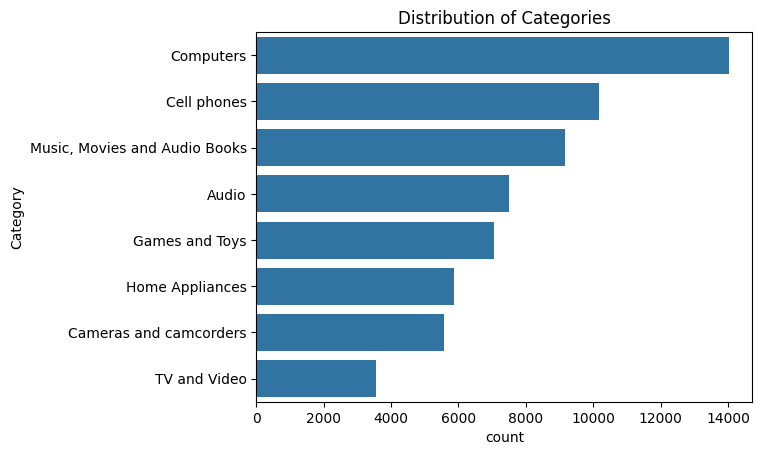

In [79]:
# Distribution of the 'Category' variable :
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title('Distribution of Categories')
plt.show()


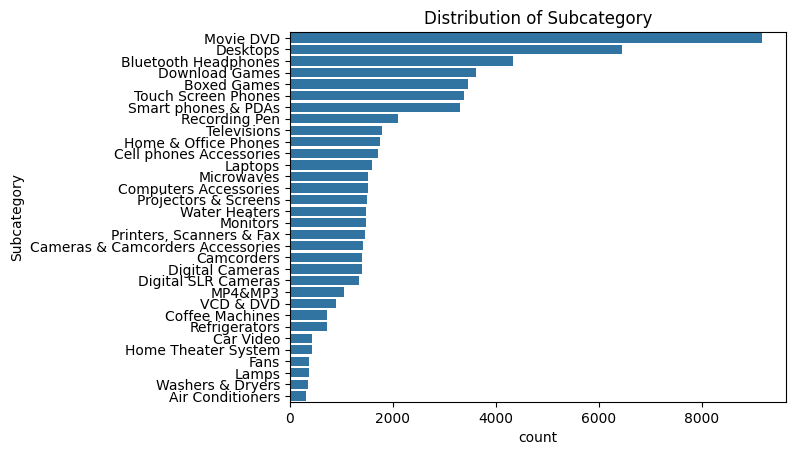

In [82]:
#Distribution of Sub Category Variable: 
sns.countplot(y='Subcategory', data=df, order=df['Subcategory'].value_counts().index)
plt.title('Distribution of Subcategory')
plt.show()

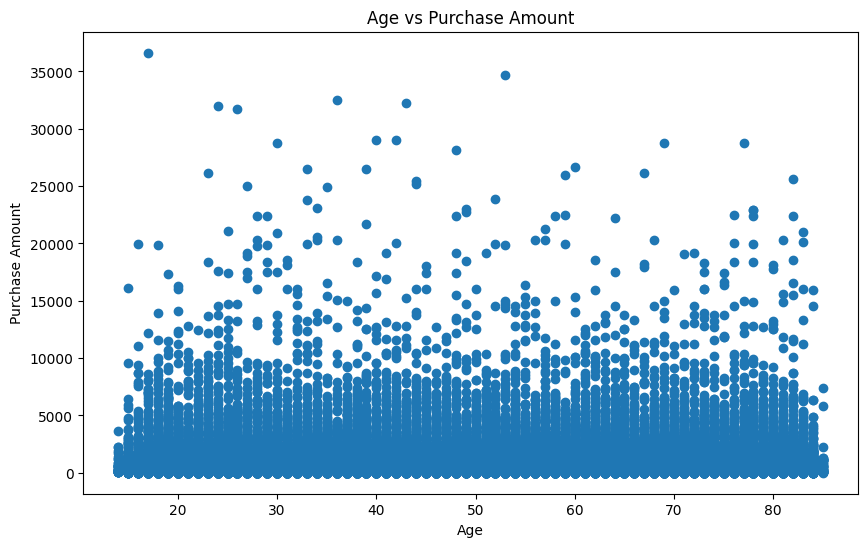

In [84]:
# Relationship between customer age and purchase amount
plt.figure(figsize=(10, 6))
plt.scatter(df['age'], df['final_price_per_unit_USD'] * df['Quantity'])
plt.title('Age vs Purchase Amount')
plt.xlabel('Age')
plt.ylabel('Purchase Amount')
plt.show()

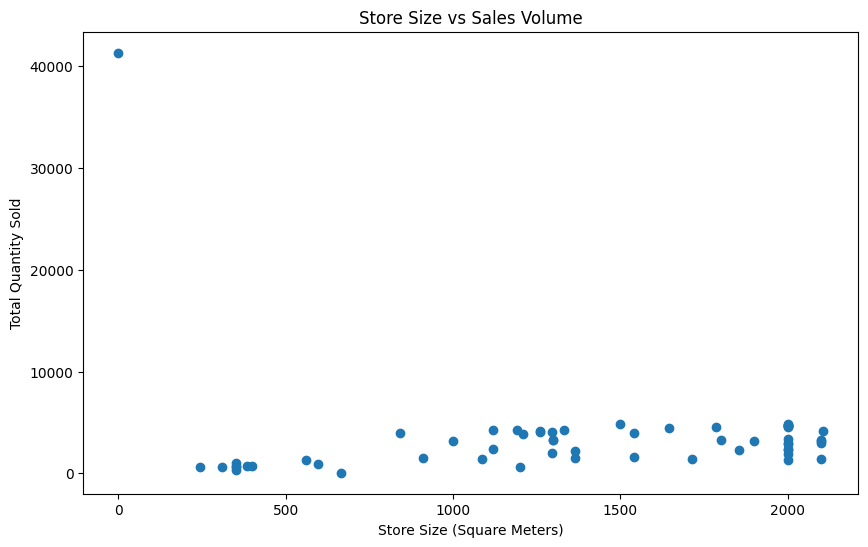

In [86]:
# Correlation between store size and sales volume
store_sales = df.groupby('StoreKey').agg({
    'Store_Size_Square_Meters': 'first',
    'Quantity': 'sum'
}).reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(store_sales['Store_Size_Square_Meters'], store_sales['Quantity'])
plt.title('Store Size vs Sales Volume')
plt.xlabel('Store Size (Square Meters)')
plt.ylabel('Total Quantity Sold')
plt.show()

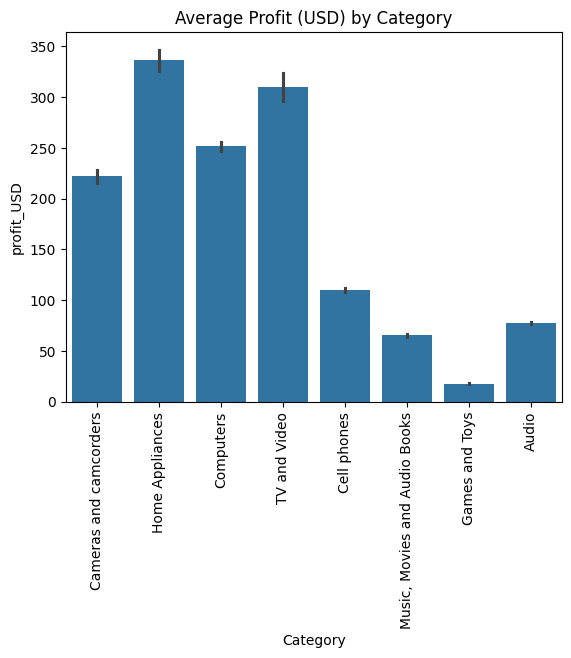

In [88]:
#Category wise Profit:
sns.barplot(x='Category', y='profit_USD', data=df, estimator=np.mean)
plt.title('Average Profit (USD) by Category')
plt.xticks(rotation=90)
plt.show()

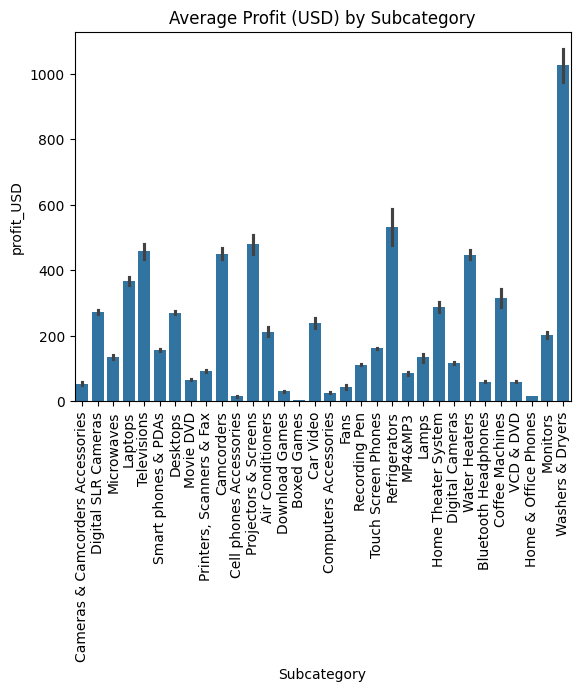

In [83]:
# Sub Category wise Profit:
sns.barplot(x='Subcategory', y='profit_USD', data=df, estimator=np.mean)
plt.title('Average Profit (USD) by Subcategory')
plt.xticks(rotation=90)
plt.show()

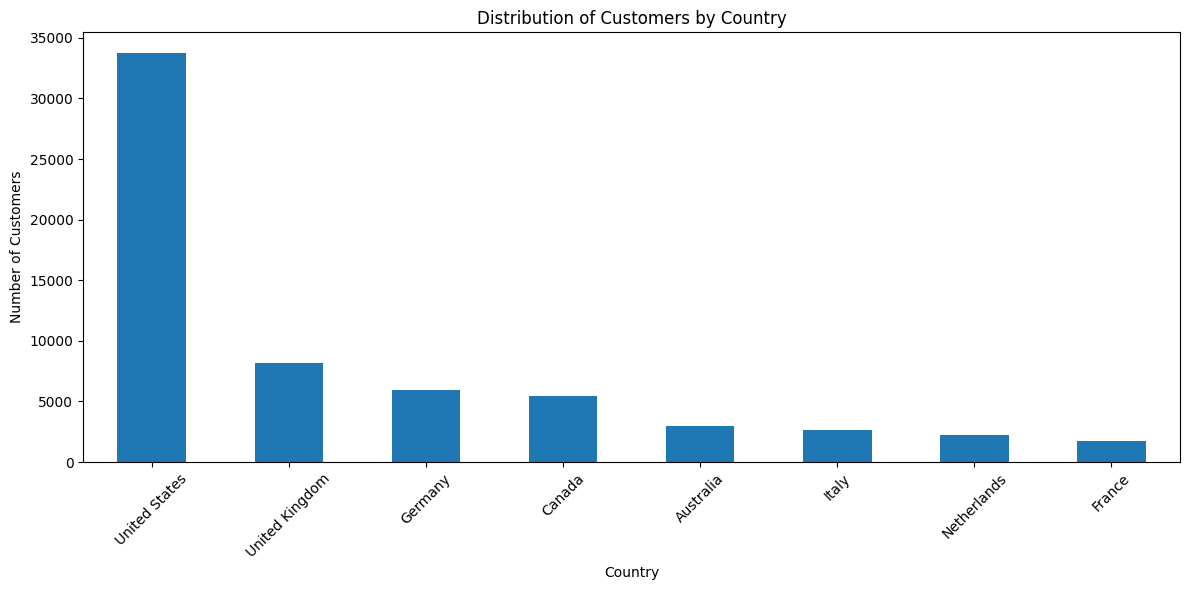

In [87]:
# Geographical distribution of customers
plt.figure(figsize=(12, 6))
df['Country_Customer'].value_counts().plot(kind='bar')
plt.title('Distribution of Customers by Country')
plt.xlabel('Country')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

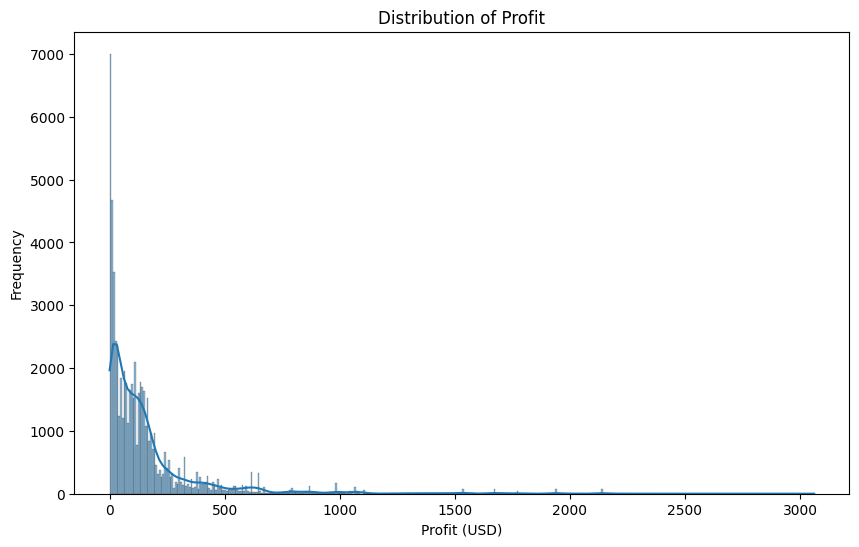

In [91]:
# Distribution of profit
plt.figure(figsize=(10, 6))
sns.histplot(df['profit_USD'], kde=True)
plt.title('Distribution of Profit')
plt.xlabel('Profit (USD)')
plt.ylabel('Frequency')
plt.show()

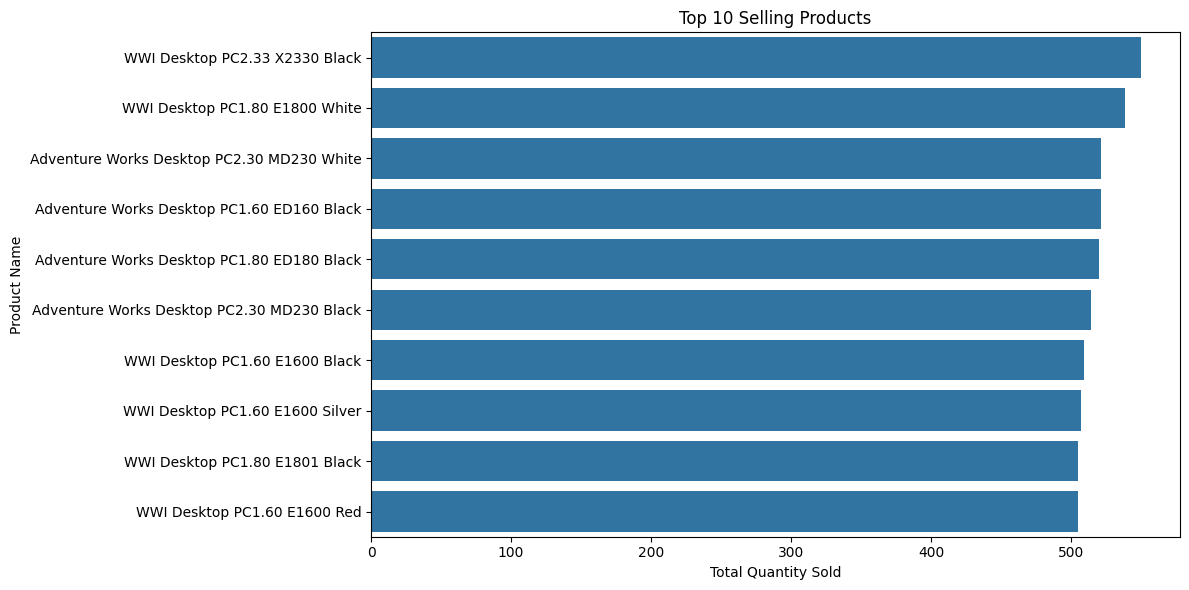

In [92]:
# Top selling products
top_products = df.groupby('Product_Name').agg({
    'Quantity': 'sum',
    'profit_USD': 'sum'
}).sort_values('Quantity', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(x='Quantity', y=top_products.index, data=top_products)
plt.title('Top 10 Selling Products')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Product Name')
plt.tight_layout()
plt.show()

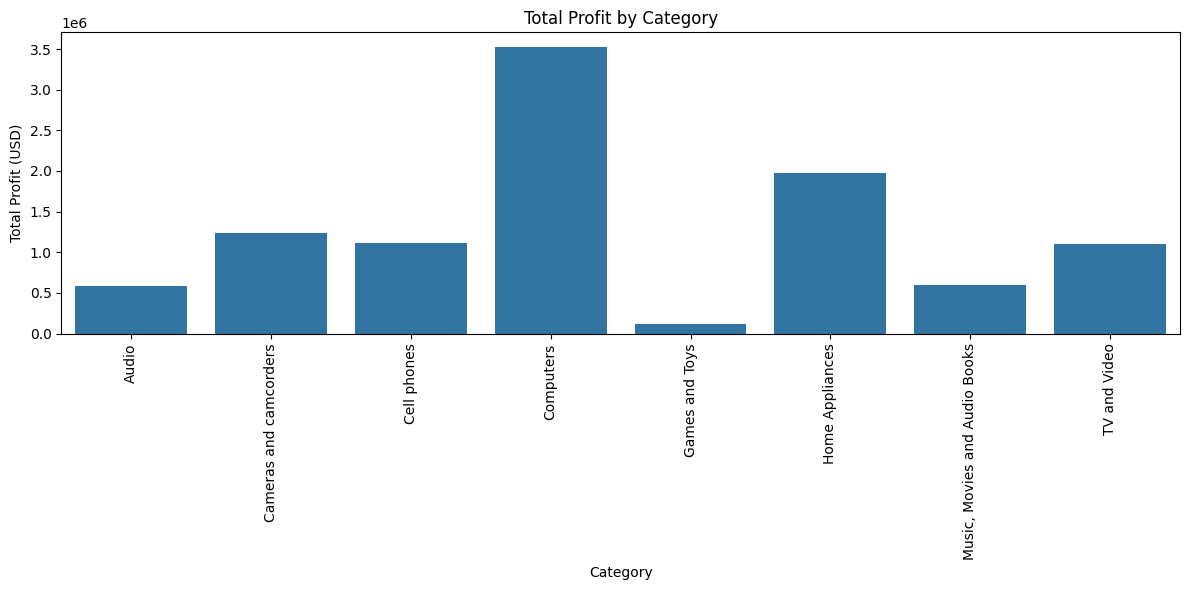

In [93]:
# Sales by Category
category_sales = df.groupby('Category').agg({
    'Quantity': 'sum',
    'profit_USD': 'sum'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Category', y='profit_USD', data=category_sales)
plt.title('Total Profit by Category')
plt.xlabel('Category')
plt.ylabel('Total Profit (USD)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_13624\1954417317.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_behavior = df.groupby('age_group').agg({


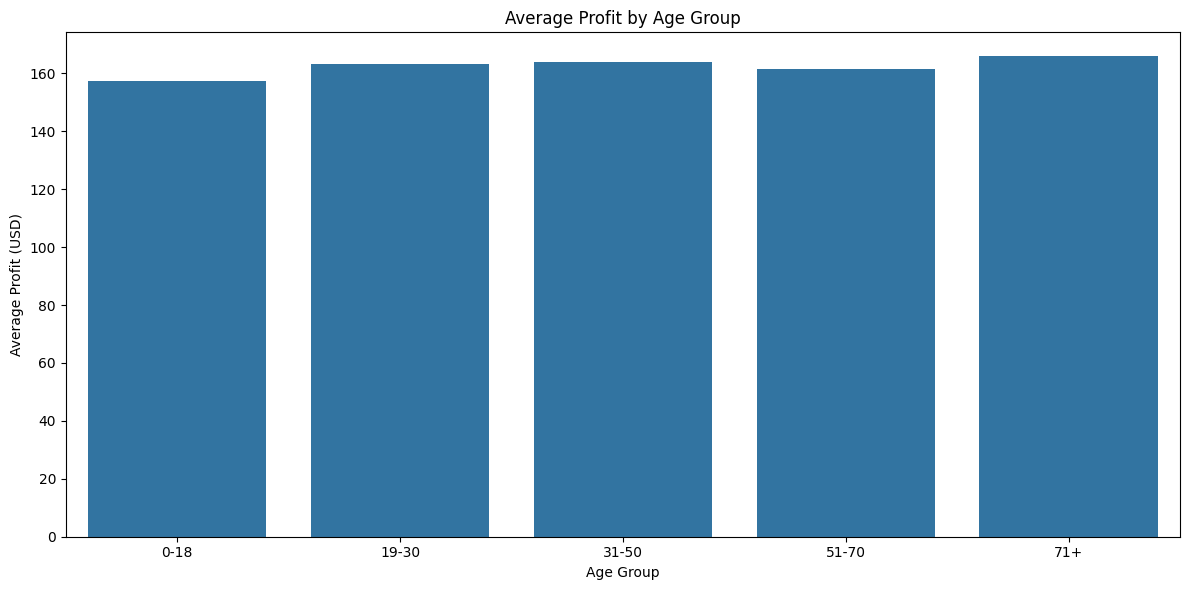

In [94]:
# Customer behavior by age group
df['age_group'] = pd.cut(df['age'], bins=[0, 18, 30, 50, 70, 100], labels=['0-18', '19-30', '31-50', '51-70', '71+'])
age_group_behavior = df.groupby('age_group').agg({
    'Quantity': 'mean',
    'profit_USD': 'mean'
}).reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='age_group', y='profit_USD', data=age_group_behavior)
plt.title('Average Profit by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Profit (USD)')
plt.tight_layout()
plt.show()

## 4. Outliers:

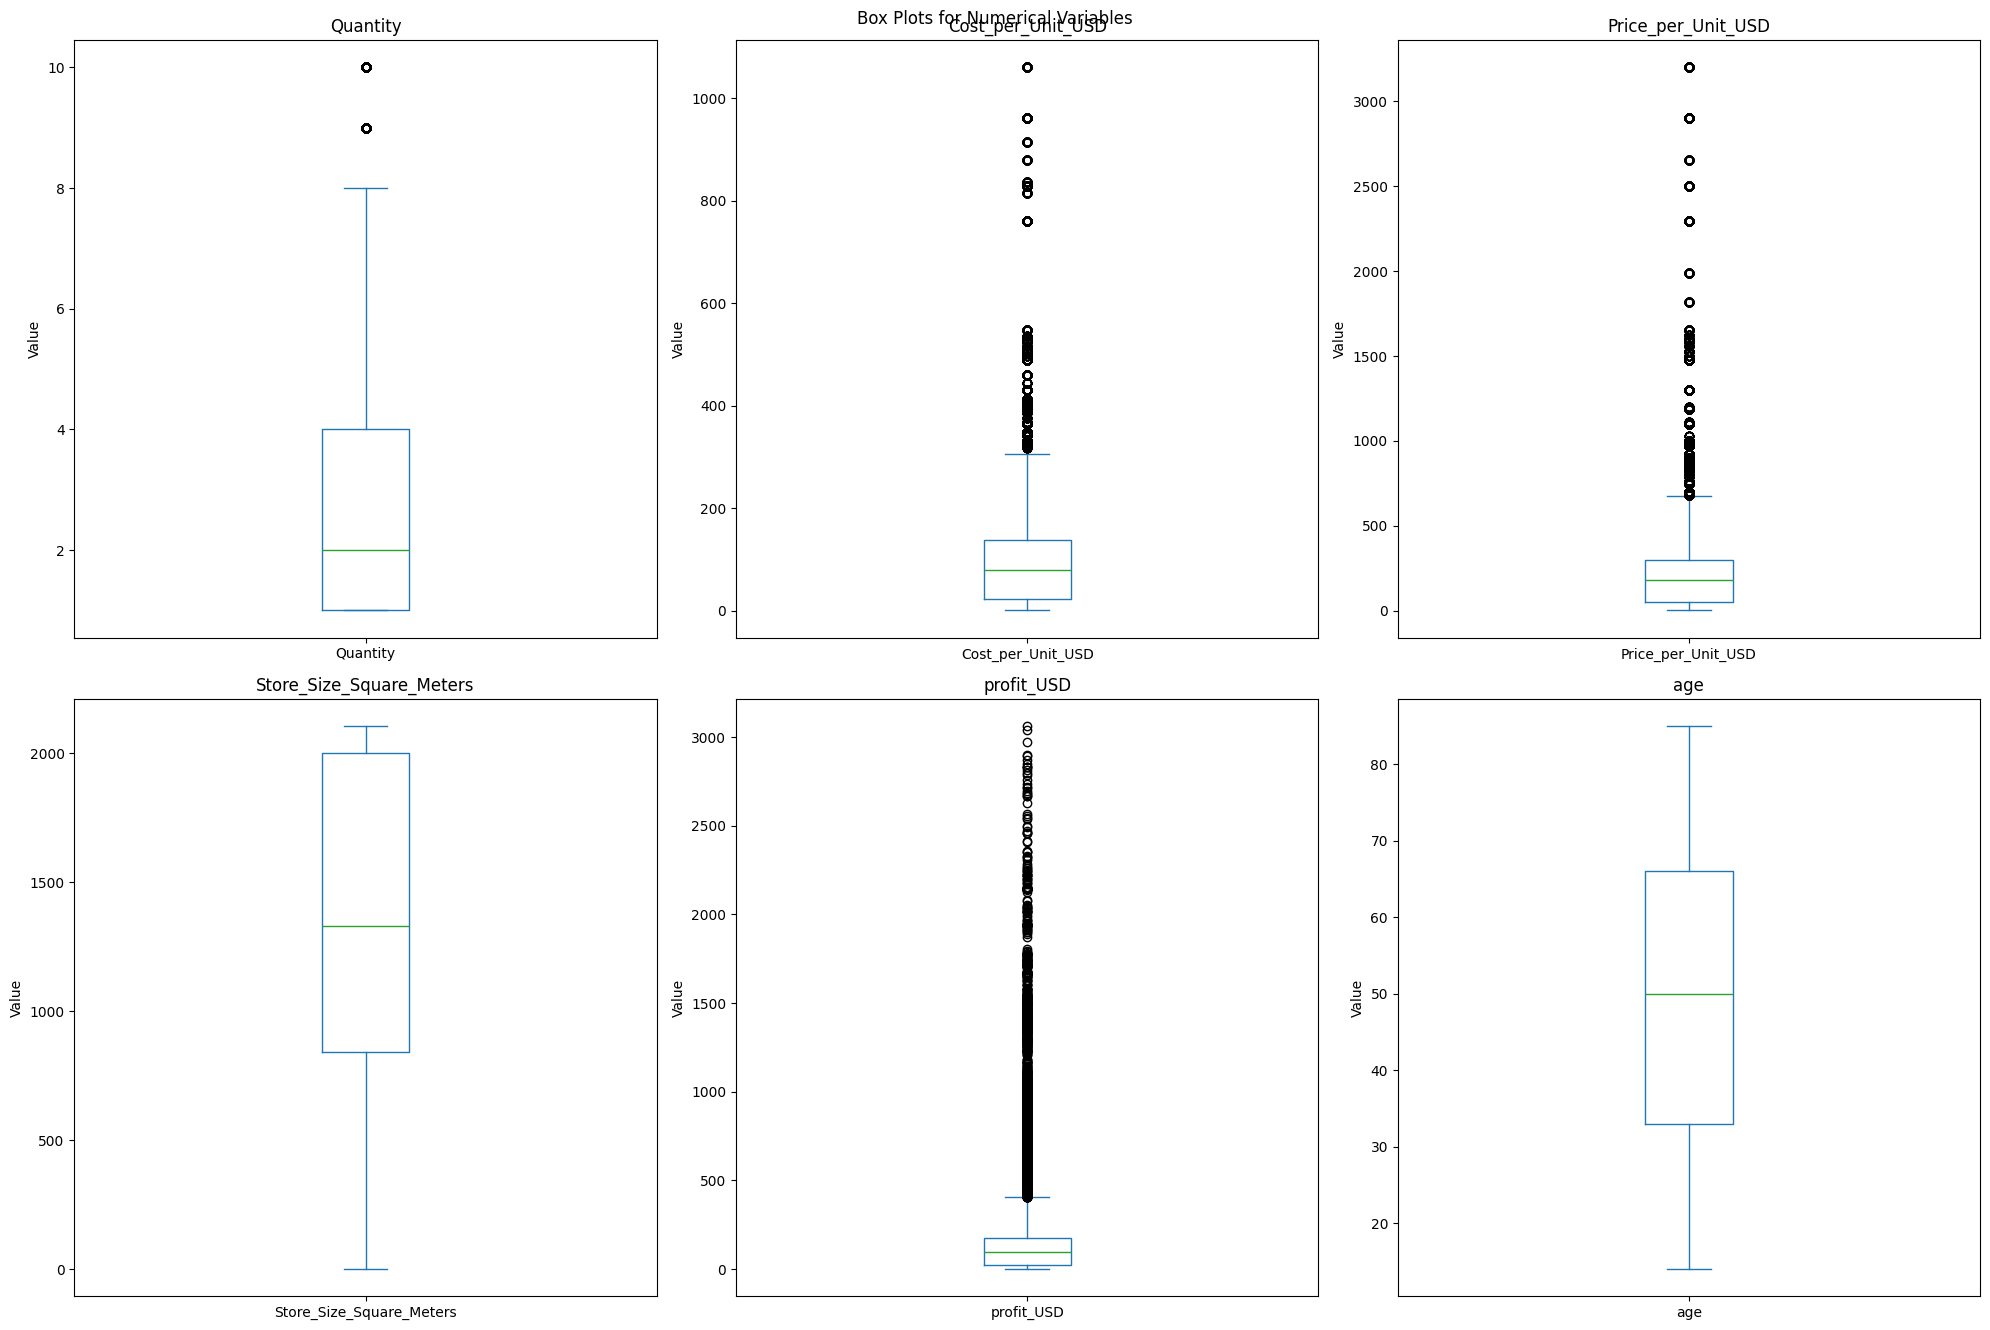

In [97]:
numerical_cols = ['Quantity', 'Cost_per_Unit_USD', 'Price_per_Unit_USD', 
                  'Store_Size_Square_Meters', 'profit_USD', 'age']
fig, axs = plt.subplots(3, 3, figsize=(20, 20))
fig.suptitle('Box Plots for Numerical Variables', fontsize=12)
axs = axs.flatten()

for i, col in enumerate(numerical_cols):
    df[col].plot(kind='box', ax=axs[i])
    axs[i].set_title(col)
    axs[i].set_ylabel('Value')
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

## 5. Correlation Between Variables:

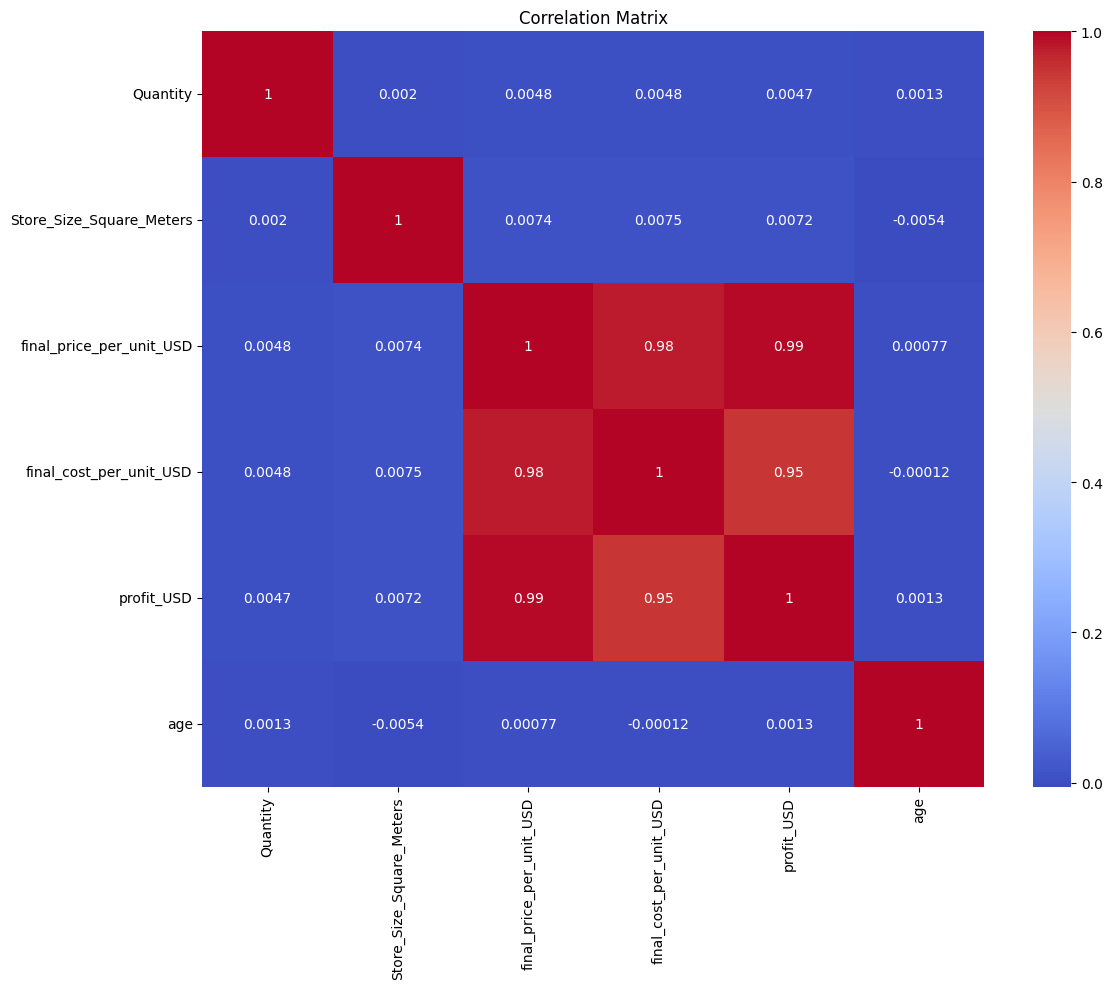

In [99]:
correlation_matrix = df[['Quantity','Store_Size_Square_Meters', 'final_price_per_unit_USD', 
                         'final_cost_per_unit_USD', 'profit_USD', 'age']].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

## 6. Time-based Analysis and Seasonality:

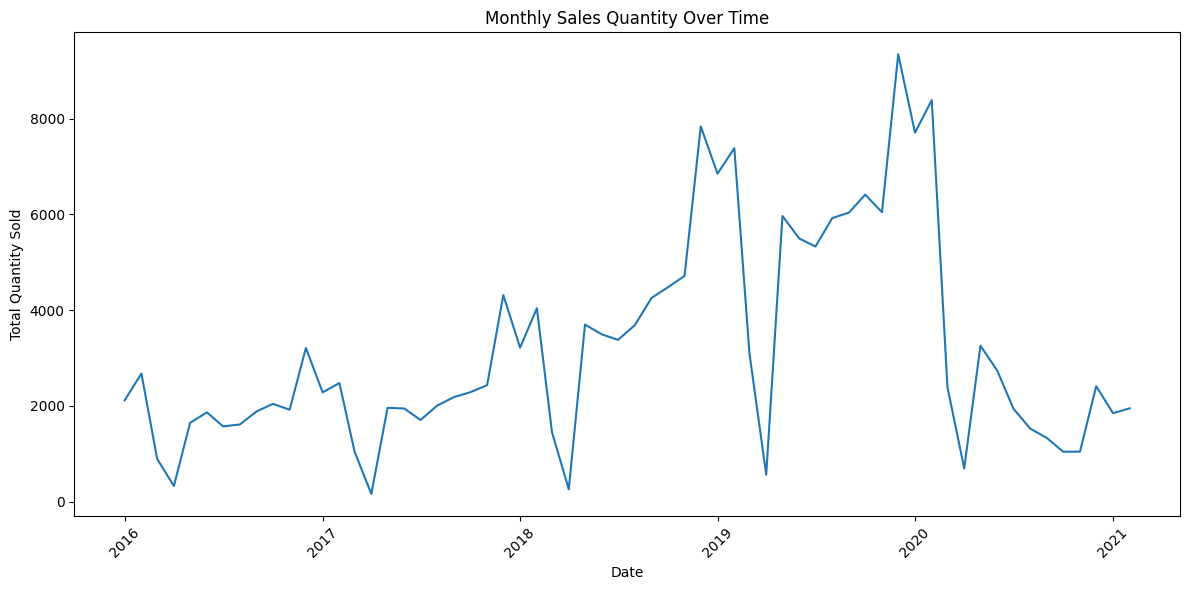

In [100]:
# Monthly Sales Quantity Over Time
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
monthly_sales = df.groupby(df['Order_Date'].dt.to_period('M')).agg({
    'Quantity': 'sum',
    'profit_USD': 'sum'
}).reset_index()

monthly_sales['Order_Date'] = monthly_sales['Order_Date'].dt.to_timestamp()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['Order_Date'], monthly_sales['Quantity'])
plt.title('Monthly Sales Quantity Over Time')
plt.xlabel('Date')
plt.ylabel('Total Quantity Sold')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

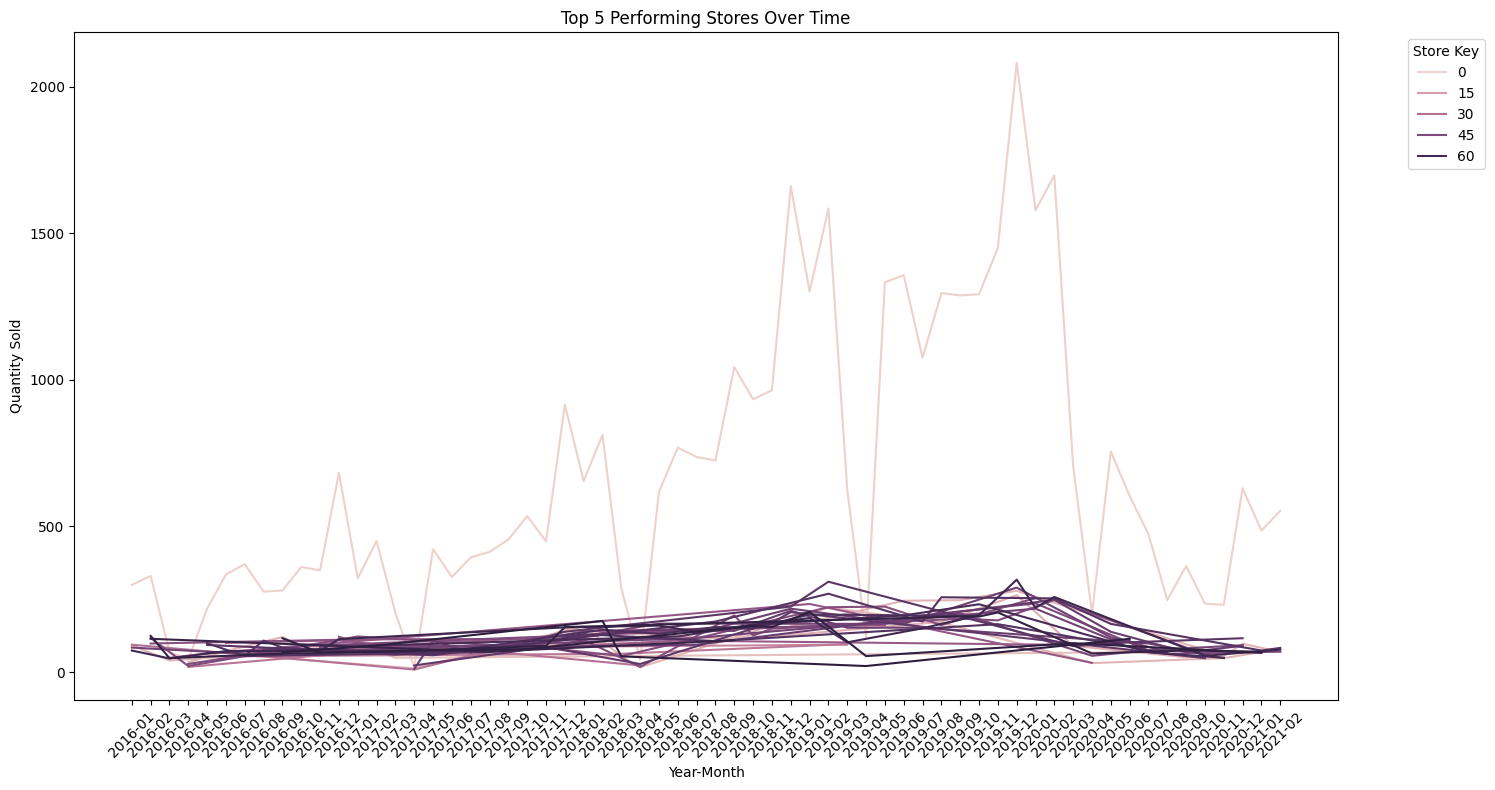

In [110]:
#Top-performing stores by year and month
top_stores = df.groupby(['YearMonth', 'StoreKey'])['Quantity'].sum().reset_index()
top_stores = top_stores.sort_values(['YearMonth', 'Quantity'], ascending=[True, False])
top_stores = top_stores.groupby('YearMonth').head(5)  # Top 5 stores

plt.figure(figsize=(15, 8))
sns.lineplot(data=top_stores, x='YearMonth', y='Quantity', hue='StoreKey')
plt.title('Top 5 Performing Stores Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45)
plt.legend(title='Store Key', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

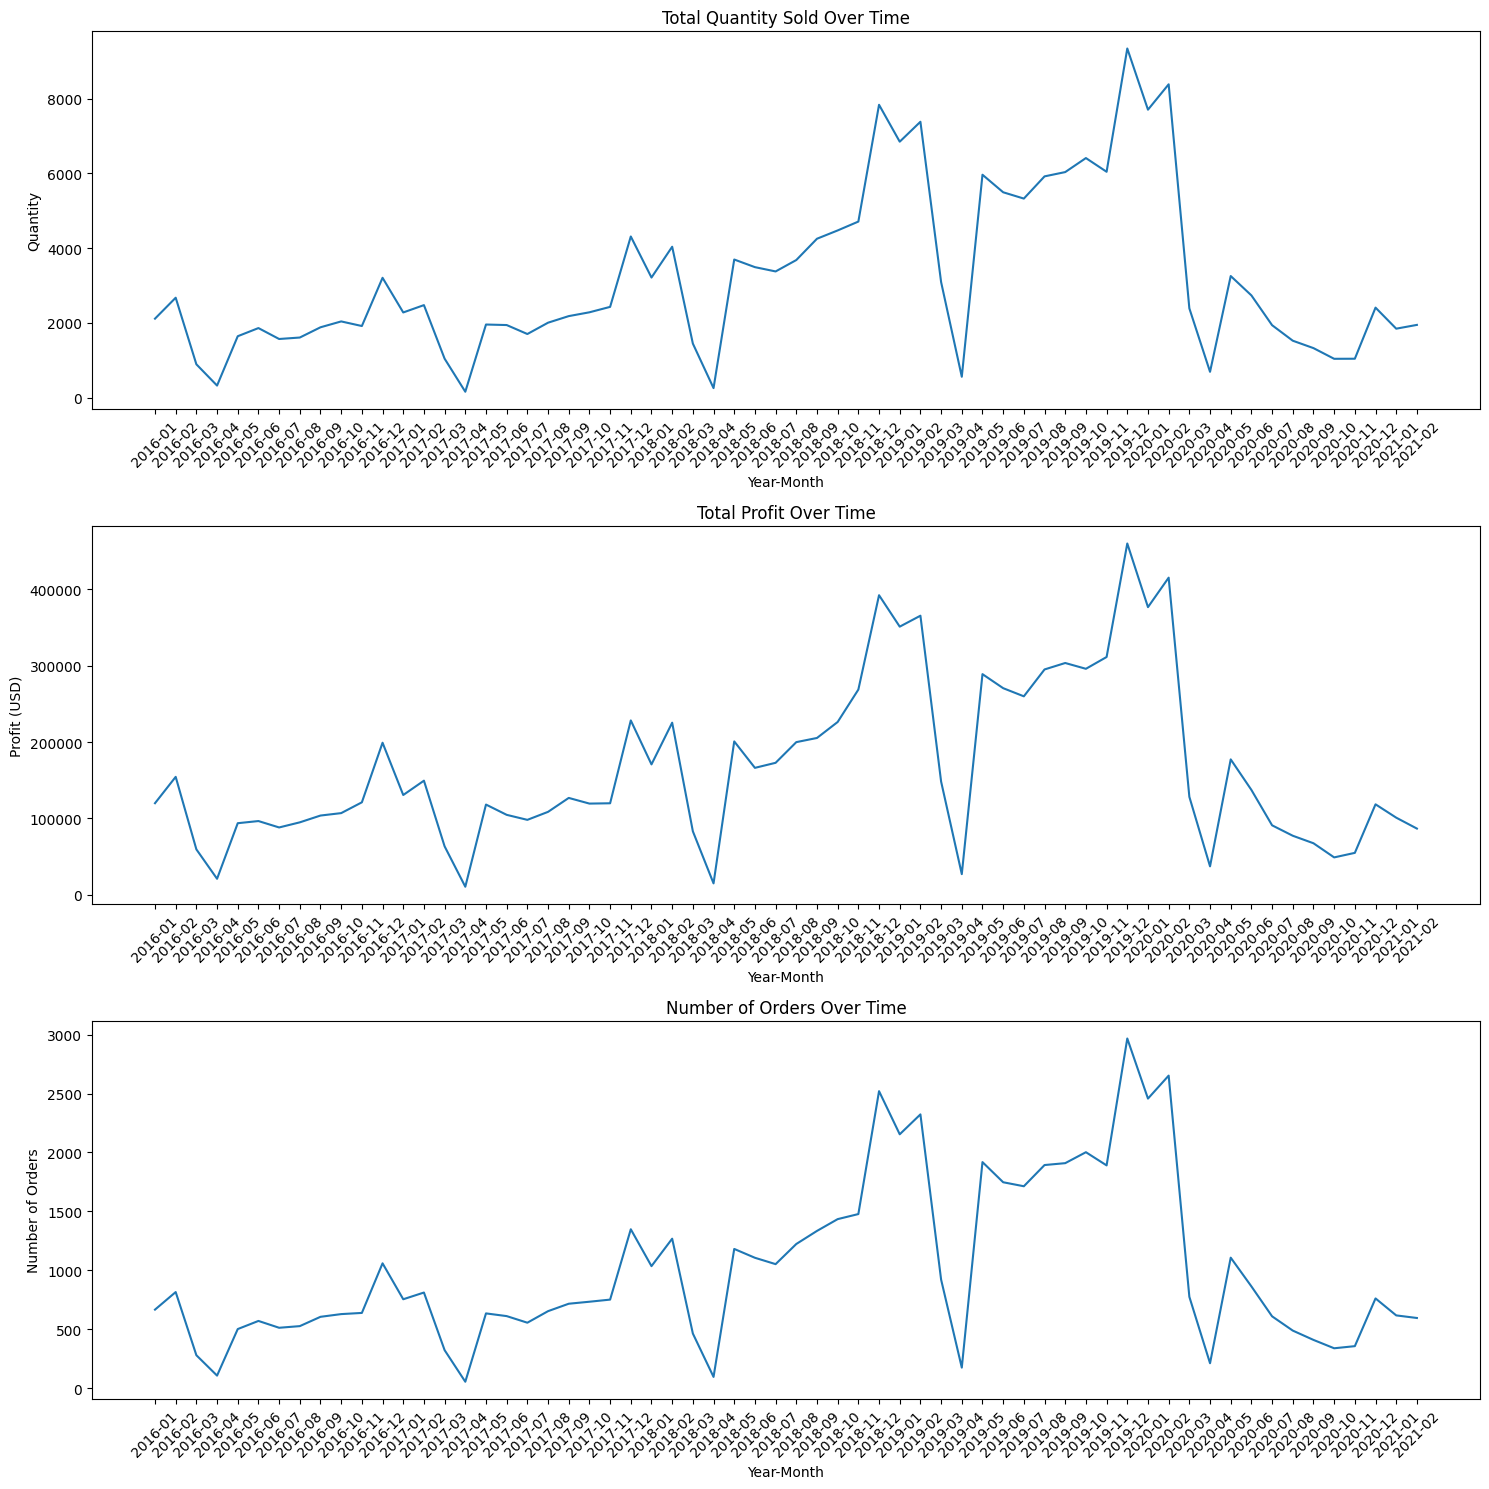

In [111]:
#Overall sales trends by year and month
sales_trend = df.groupby('YearMonth').agg({
    'Quantity': 'sum',
    'profit_USD': 'sum',
    'Order_ID': 'count'
}).reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(15, 15))

sns.lineplot(data=sales_trend, x='YearMonth', y='Quantity', ax=ax1)
ax1.set_title('Total Quantity Sold Over Time')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Quantity')
ax1.tick_params(axis='x', rotation=45)

sns.lineplot(data=sales_trend, x='YearMonth', y='profit_USD', ax=ax2)
ax2.set_title('Total Profit Over Time')
ax2.set_xlabel('Year-Month')
ax2.set_ylabel('Profit (USD)')
ax2.tick_params(axis='x', rotation=45)

sns.lineplot(data=sales_trend, x='YearMonth', y='Order_ID', ax=ax3)
ax3.set_title('Number of Orders Over Time')
ax3.set_xlabel('Year-Month')
ax3.set_ylabel('Number of Orders')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

In [112]:
# Tabular summary of top products and stores
# Top products overall
top_products_overall = df.groupby('Product_Name')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Products Overall:")
print(top_products_overall)

# Top stores overall
top_stores_overall = df.groupby('StoreKey')['Quantity'].sum().sort_values(ascending=False).head(5)
print("\nTop 5 Stores Overall:")
print(top_stores_overall)

# Top products for each year
df['Year'] = df['Order_Date'].dt.year
yearly_top_products = df.groupby(['Year', 'Product_Name'])['Quantity'].sum().reset_index()
yearly_top_products = yearly_top_products.sort_values(['Year', 'Quantity'], ascending=[True, False])
yearly_top_products = yearly_top_products.groupby('Year').head(5)
print("\nTop 5 Products for Each Year:")
print(yearly_top_products)

# Top stores for each year
yearly_top_stores = df.groupby(['Year', 'StoreKey'])['Quantity'].sum().reset_index()
yearly_top_stores = yearly_top_stores.sort_values(['Year', 'Quantity'], ascending=[True, False])
yearly_top_stores = yearly_top_stores.groupby('Year').head(5)
print("\nTop 5 Stores for Each Year:")
print(yearly_top_stores)


Top 5 Products Overall:
Product_Name
WWI Desktop PC2.33 X2330 Black                550
WWI Desktop PC1.80 E1800 White                538
Adventure Works Desktop PC2.30 MD230 White    521
Adventure Works Desktop PC1.60 ED160 Black    521
Adventure Works Desktop PC1.80 ED180 Black    520
Name: Quantity, dtype: int64

Top 5 Stores Overall:
StoreKey
0     41311
9      4894
55     4826
50     4773
61     4771
Name: Quantity, dtype: int64

Top 5 Products for Each Year:
       Year                                       Product_Name  Quantity
1844   2016                     WWI Desktop PC2.33 X2330 Black        78
1623   2016                          SV DVD Recorder L240 Gold        73
416    2016         Contoso DVD 55DVD Storage Binder M56 Black        69
429    2016     Contoso DVD 9-Inch Player Portable M300 Silver        64
439    2016                       Contoso DVD Player M130 Grey        64
3790   2017                 WWI 1GB Pulse Smart pen E50 Silver        92
3789   2017      WWI

## Memory usage:

In [113]:
print("\nMemory usage:")
print(df.memory_usage(deep=True))


Memory usage:
Index                           132
id                           503072
CustomerKey                 3999358
Name                        4503900
Gender                      3898084
Birthday                    2515360
City                        4218131
State_Code                  3781014
State_Customer              4271394
Zip_Code                    3928446
Country_Customer            4286525
Continent                   4244789
Order_ID                    4012713
Item_Number                  503072
ProductKey                   503072
Product_Name                6151423
Quantity                     503072
Brand                       4388311
Color                       3894884
Cost_per_Unit_USD            503072
Price_per_Unit_USD           503072
Currency_Code               3773040
SubcategoryKey               503072
Subcategory                 4464915
CategoryKey                  503072
Category                    4477520
Order_Date                   503072
Delivery_Date

In [114]:
df

,id,CustomerKey,Name,Gender,Birthday,City,State_Code,State_Customer,Zip_Code,Country_Customer,...,Store_Size_Square_Meters,Open_Date,final_price_per_unit_USD,final_cost_per_unit_USD,profit_USD,age,days_to_deliver,age_group,YearMonth,Year
0,1,265598,Tyler Vaught,Male,1971-03-23,London,ON,Ontario,N5W 5K6,Canada,...,1210.0,2015-04-04,94.41,43.42,50.99,44,0,31-50,2016-01,2016
1,2,1269051,Frank Upchurch,Male,1995-11-20,Auberry,CA,California,93602,United States,...,0.0,2010-01-01,427.00,141.47,285.53,20,12,19-30,2016-01,2016
2,3,1269051,Frank Upchurch,Male,1995-11-20,Auberry,CA,California,93602,United States,...,0.0,2010-01-01,665.94,220.64,445.30,20,12,19-30,2016-01,2016
3,4,266019,Joan Roche,Female,1962-08-24,Red Deer,AB,Alberta,T4N 2A6,Canada,...,0.0,2010-01-01,447.06,205.59,241.47,53,11,51-70,2016-01,2016
4,5,266019,Joan Roche,Female,1962-08-24,Red Deer,AB,Alberta,T4N 2A6,Canada,...,0.0,2010-01-01,452.62,230.75,221.87,53,11,51-70,2016-01,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62879,62880,1216913,Donald Woodie,Male,1939-04-16,Garden Grove,CA,California,92643,United States,...,1190.0,2015-01-01,139.00,70.87,68.13,81,0,71+,2021-02,2021
62880,62881,511229,Gabriele Thalberg,Female,1940-03-10,Stuttgart Frauenkopf,BW,Baden-Württemberg,70184,Germany,...,0.0,2010-01-01,98.86,45.46,53.40,81,4,71+,2021-02,2021
62881,62882,331277,William Rochelle,Male,1993-05-25,Calgary,AB,Alberta,T2T 0C6,Canada,...,0.0,2010-01-01,138.70,70.72,67.98,27,3,19-30,2021-02,2021
62882,62883,331277,William Rochelle,Male,1993-05-25,Calgary,AB,Alberta,T2T 0C6,Canada,...,0.0,2010-01-01,88.43,40.67,47.76,27,3,19-30,2021-02,2021
